In [1]:
# How does the minimum wage of educational service workers compare to other jobs?

In [2]:
import pandas as pd
from stats_can import StatsCan
sc = StatsCan()

In [3]:
df = sc.vectors_to_df(["v1592178", "v1592169", "v1592335", "v1592341", "v44311179"], start_date="2012-01-01")

In [4]:
df.columns = ["Manufacturing", "Construction", "Finance and insurance", "Real estate and rental and leasing", "Educational services"]
df.index.names = ["Date"]
df.index = pd.to_datetime(df.index)

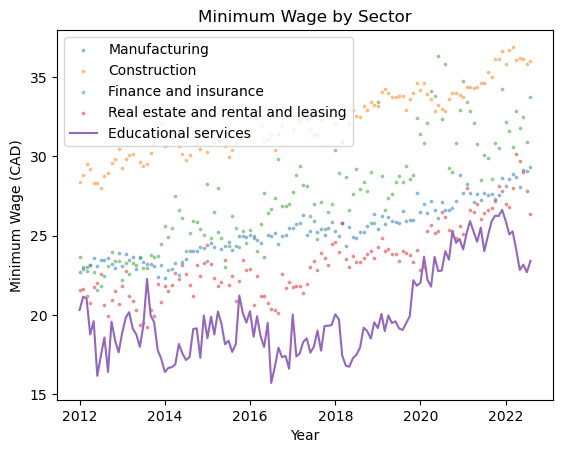

In [5]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column == "Educational services":
        plt.plot(df.index, df[column], color="#9467bd")
    else:
        plt.scatter(df.index, df[column], s=3, alpha=0.4)

plt.legend(df.columns)
plt.title("Minimum Wage by Sector")
plt.ylabel("Minimum Wage (CAD)")
plt.xlabel("Year")
plt.show()


In [6]:
df.describe()

,Manufacturing,Construction,Finance and insurance,Real estate and rental and leasing,Educational services
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,25.309687,32.288906,27.540078,23.383125,20.103047
std,1.742630,2.072889,3.450649,2.319035,2.793170
min,22.350000,27.990000,21.580000,19.210000,15.700000
25%,23.882500,30.812500,24.845000,21.787500,17.977500
50%,25.175000,32.410000,27.255000,23.135000,19.400000
75%,26.457500,33.782500,29.845000,24.657500,22.062500
max,29.310000,36.920000,36.370000,30.180000,26.630000


Text(0.5, 1.0, 'Average Minimum Wage')

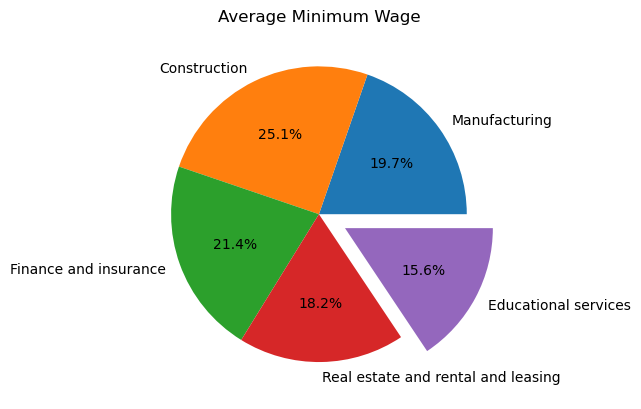

In [7]:
import matplotlib.pyplot as plt
plt.pie(df.mean(), labels=df.columns, explode=([0.0] * 4 + [0.2]), autopct="%.1f%%")
plt.title("Average Minimum Wage")


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

regressors = {
    "manufacturing": LinearRegression(),
    "construction": LinearRegression(),
    "finance_insurance": LinearRegression(),
    "real_estate": LinearRegression(),
    "education": LinearRegression()
}

In [9]:
years = [f"{year}" for year in range(2012, 2023)]

for k, v in enumerate(regressors):
    regressors[v].fit(X=np.array(df.index).astype(float).reshape((-1, 1)), y=np.array(df[df.columns[k]]).reshape((-1, 1)))

In [10]:
df_best_fit = pd.DataFrame(index=years)

for k, v in enumerate(regressors):
    y_pred = regressors[v].predict(np.array(pd.to_datetime(years)).astype(float).reshape(-1, 1))
    df_best_fit[df.columns[k]] = y_pred

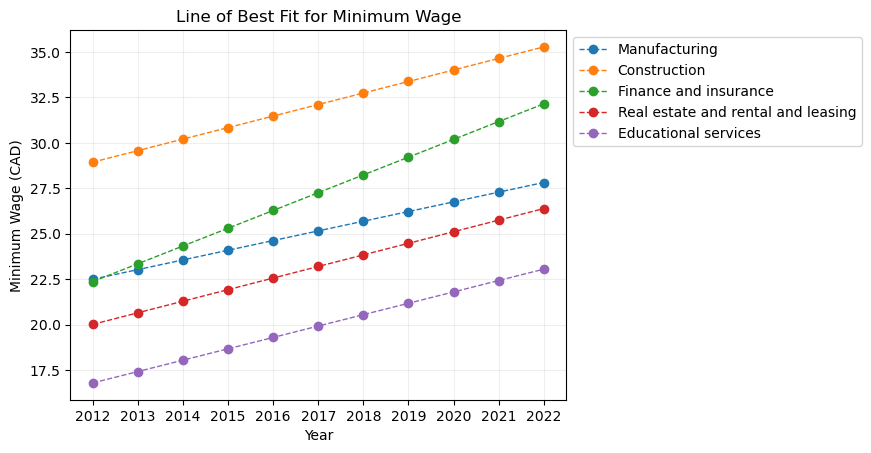

In [11]:
plt.plot(df_best_fit.index, df_best_fit, marker='o', linestyle='dashed', label=df_best_fit.columns,
     linewidth=1, markersize=6)
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.title("Line of Best Fit for Minimum Wage")
plt.xlabel("Year")
plt.ylabel("Minimum Wage (CAD)")
plt.grid(alpha=0.2)
plt.show()

In [12]:
growth_df = pd.DataFrame()
growth_df['Sectors'] = df.columns
growth_df['Growth per Year'] = np.nan

In [13]:
start_date, end_date = '2012-01-01', '2022-01-01'

growths_per_year = np.empty(0, dtype=float)

for k, v in enumerate(regressors):
    start_date_pred = regressors[v].predict(np.array(pd.to_datetime([start_date])).astype(float).reshape(-1, 1))
    end_date_pred = regressors[v].predict(np.array(pd.to_datetime([end_date])).astype(float).reshape(-1, 1))
    growth_per_year = (end_date_pred - start_date_pred) / (2022 - 2012)
    growths_per_year = np.append(growths_per_year, growth_per_year)

growth_df["Growth per Year"] = growths_per_year

In [14]:
growth_df

,Sectors,Growth per Year
0,Manufacturing,0.532195
1,Construction,0.633794
2,Finance and insurance,0.977278
3,Real estate and rental and leasing,0.636858
4,Educational services,0.625666


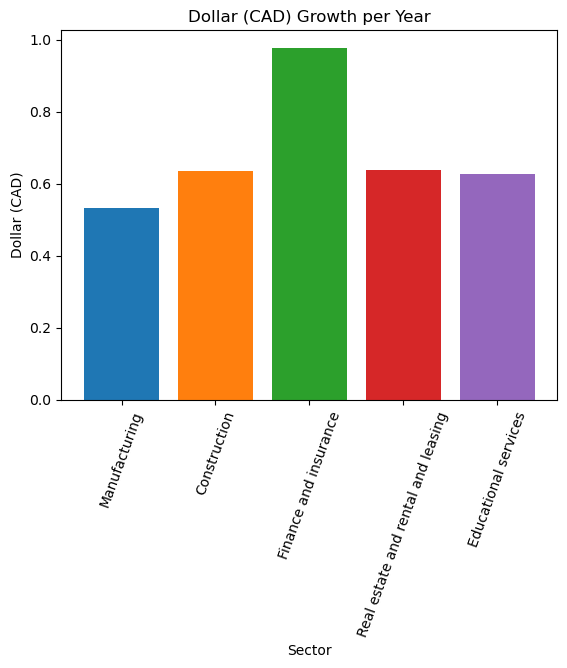

In [15]:
plt.bar(growth_df["Sectors"], growth_df["Growth per Year"], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xticks(rotation=70)
plt.title("Dollar (CAD) Growth per Year")
plt.ylabel("Dollar (CAD)")
plt.xlabel("Sector")
plt.show()